In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
# Create pandas dataframe for the data

df = pd.read_csv('movies.csv')

In [3]:
# View the first five rows 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Get summary of the entire dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Summary data shows some of the columns contain missing data.
# Therefore, before proceeding, let's fill in these missing values

# Fill in the 'budget' and 'gross' columns using 'transform' method

df['budget'] = df.groupby('year')['budget'].transform(lambda x: x.fillna(x.mean()))
df['gross'] = df.groupby('year')['gross'].transform(lambda x: x.fillna(x.mean()))

# Fill in the remaining values directly without grouping

for col in df.columns:
        
    if sum(df[col].isnull()):
            
        if df[col].dtype == 'O':
            df[col] = df[col].fillna(df[col].mode()[0])
            
        else:
            df[col] = df[col].fillna(df[col].mean())
            
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Let's check for duplicate rows 

sum(df.duplicated())

0

In [7]:
# Now let's look at the summary statistics of the numerical columns

df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000
mean,2000.405451,6.390411,8.810850e+04,3.390723e+07,7.765470e+07,107.261613
std,11.153508,0.968652,1.632918e+05,3.621760e+07,1.638973e+08,18.576400
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.210319e+07,4.681151e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.200000e+07,2.100874e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.428688e+07,7.406123e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [8]:
# Create a date column.

df['date'] = df['released'].apply(lambda x: x.split('(')[0])

df['date'] = pd.to_datetime(df['date'])

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [9]:
# Create 'released_country' column

df['released_country'] = df['released'].apply(lambda x: x.split('(')[-1].replace(')', ''))

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,United States


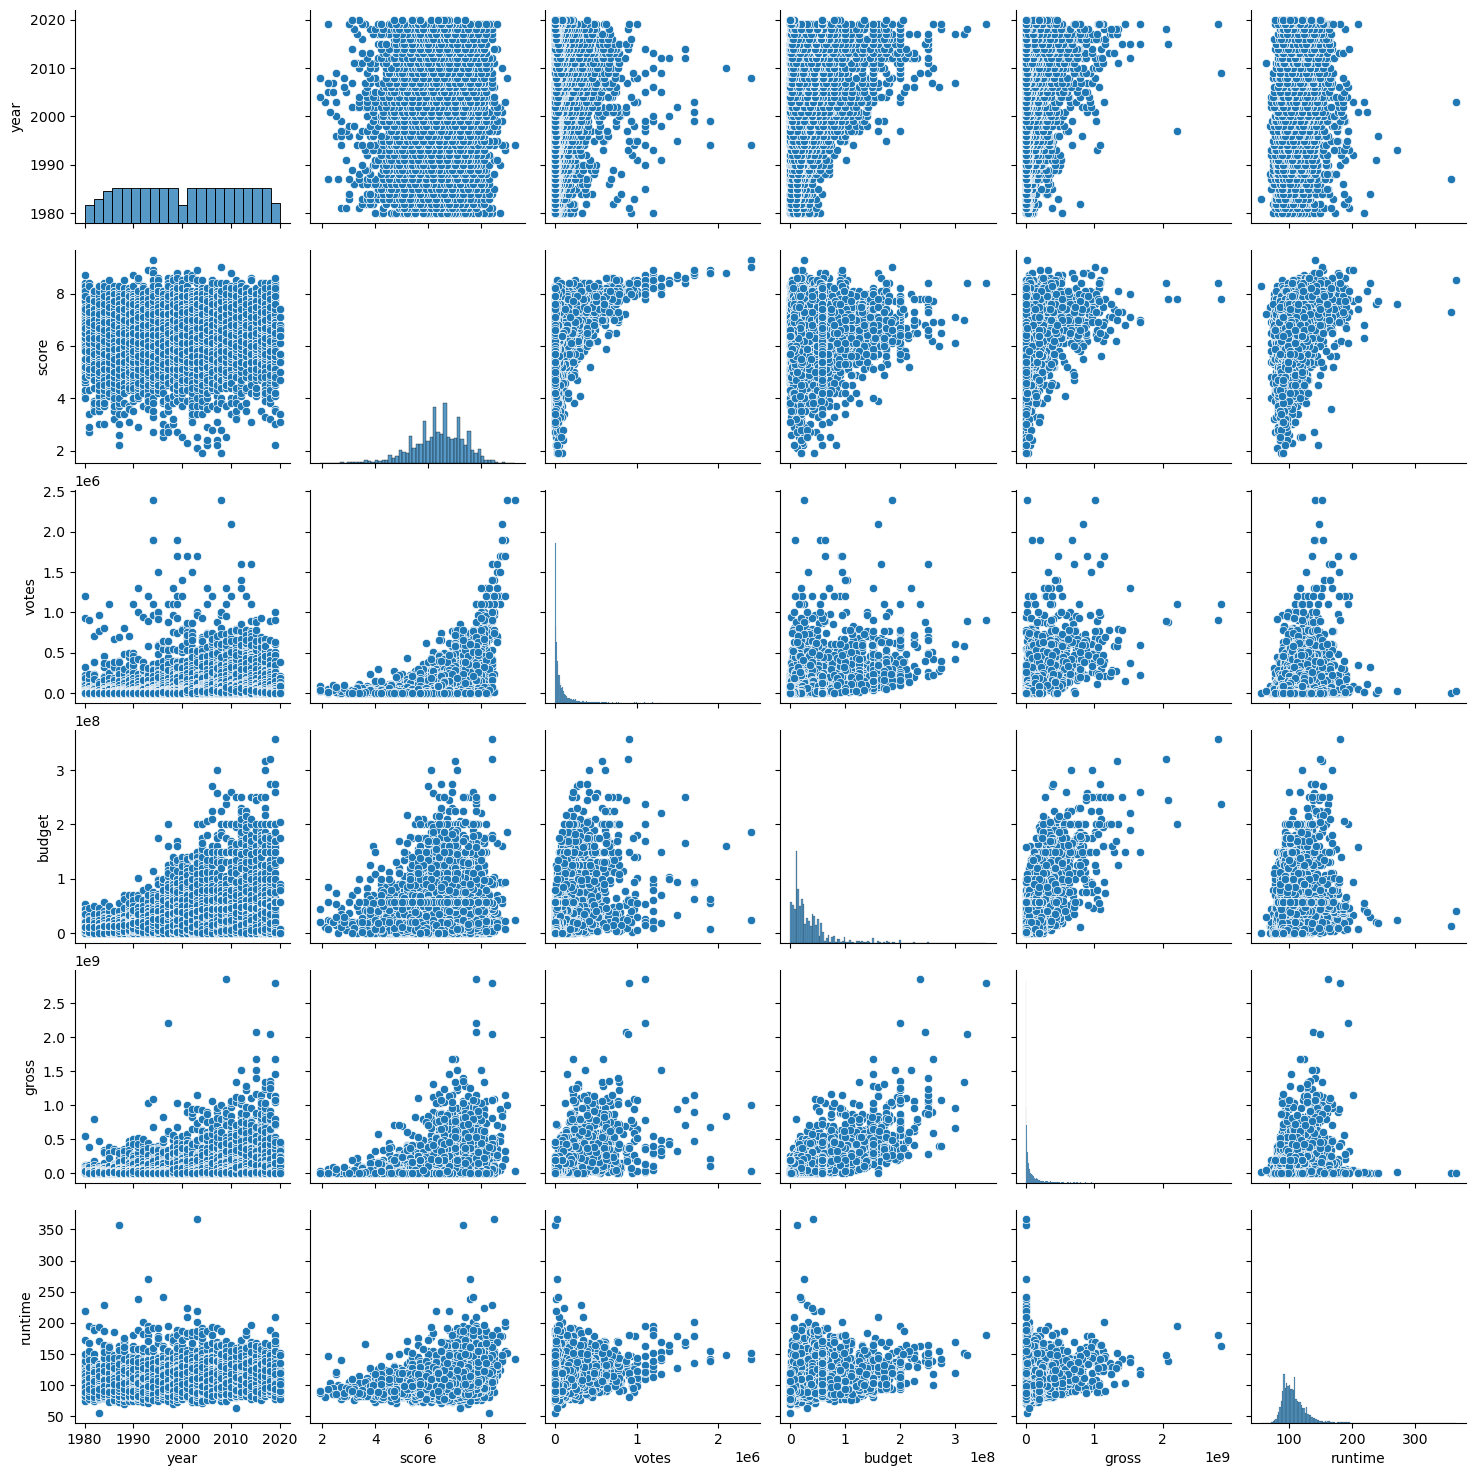

In [10]:
# Visualize the relationships between the numerical columns

sns.pairplot(df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

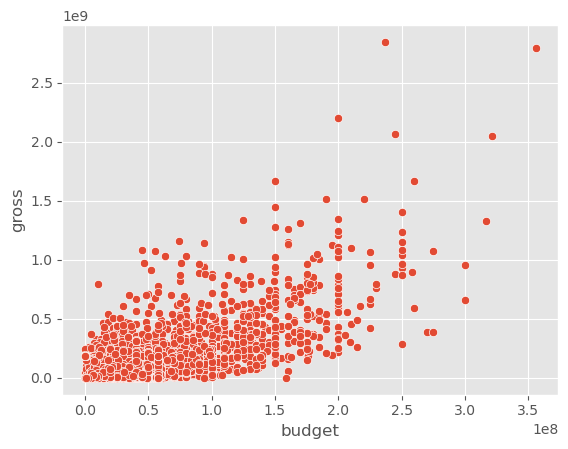

In [11]:
# There seem to be high correlation between 'budget' and 'gross', and between 'votes' and 'gross'
# Let's start by having a closer look at the relationship between 'budget' and 'gross' 

plt.style.use('ggplot')

sns.scatterplot(x='budget', y='gross', data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

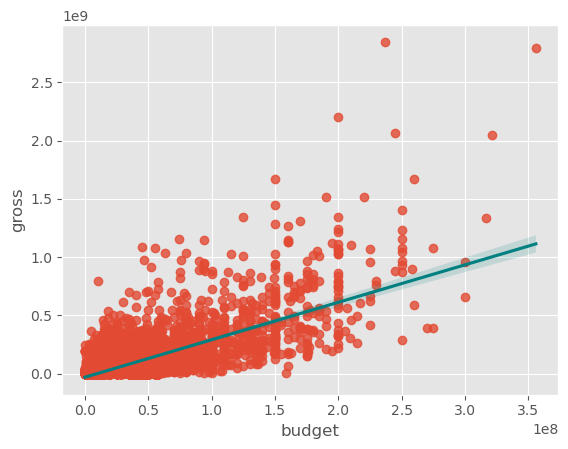

In [12]:
# Use a regression plot to see the correlation and the trend more clearly

sns.regplot(x='budget', y='gross', data=df, line_kws={'color':'teal'})

<AxesSubplot:xlabel='votes', ylabel='gross'>

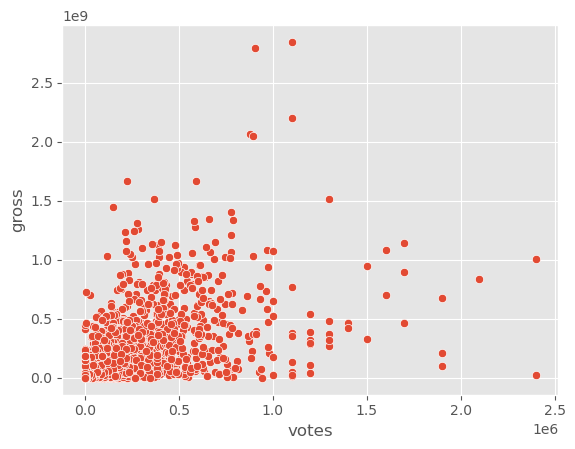

In [13]:
# Let's have a closer look at the relationship between 'gross' and 'votes'

sns.scatterplot(x='votes', y='gross', data=df)

<AxesSubplot:xlabel='votes', ylabel='gross'>

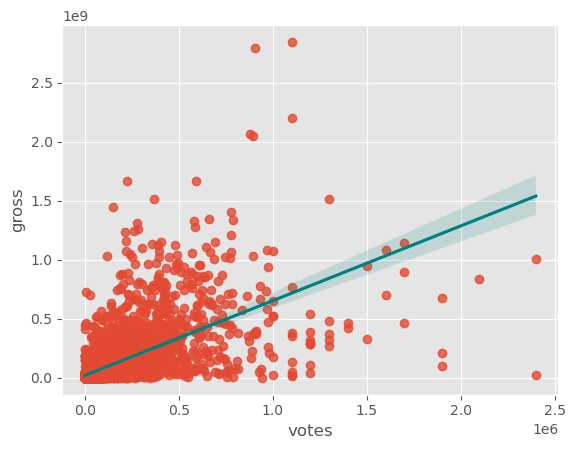

In [14]:
# Plot a regression plot between 'votes' and 'gross'

sns.regplot(x='votes', y='gross', data=df, line_kws={'color':'teal'})

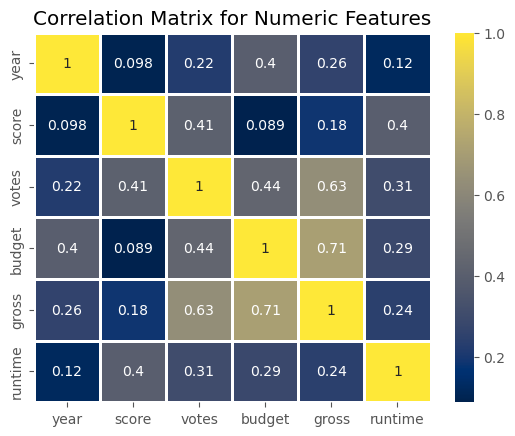

In [15]:
# Let's look at the correlations in the data using a heatmap

sns.heatmap(df.corr(), cmap='cividis', linewidths=1, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.show()

<AxesSubplot:xlabel='gross', ylabel='Count'>

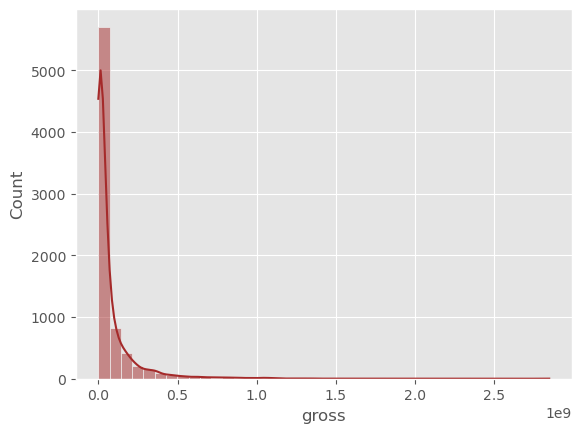

In [19]:
# Let's look at the distributions within some of the numerical columns
# Let's start with the 'gross' column

sns.histplot(x='gross', data=df, bins=40, kde=True, color='brown')

<AxesSubplot:xlabel='budget', ylabel='Count'>

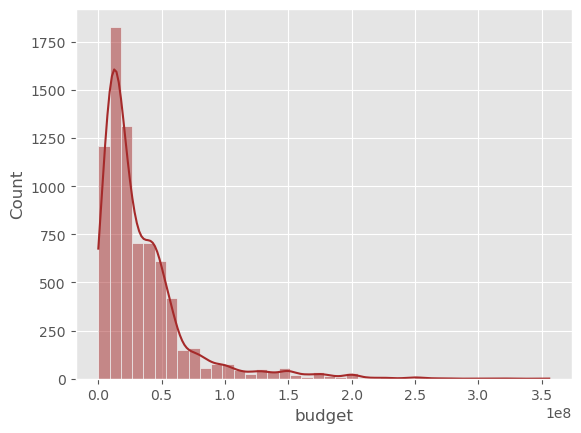

In [20]:
# Let's look at the distribution within the 'budget' column

sns.histplot(x='budget', data=df, bins=40, kde=True, color='brown')

<AxesSubplot:xlabel='score', ylabel='Count'>

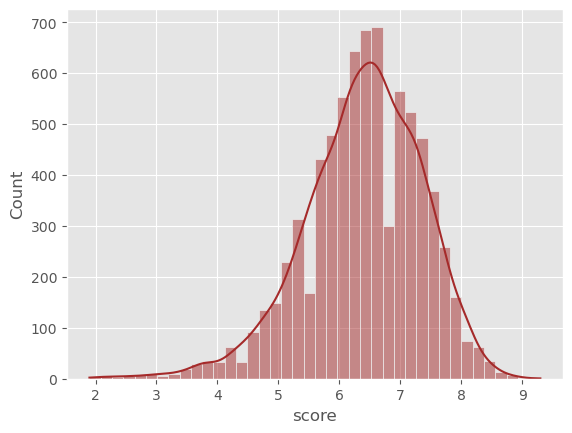

In [18]:
# Visualize the distribution within 'score'

sns.histplot(x='score', data=df, bins=40, color='brown', kde=True)

<AxesSubplot:xlabel='votes', ylabel='Count'>

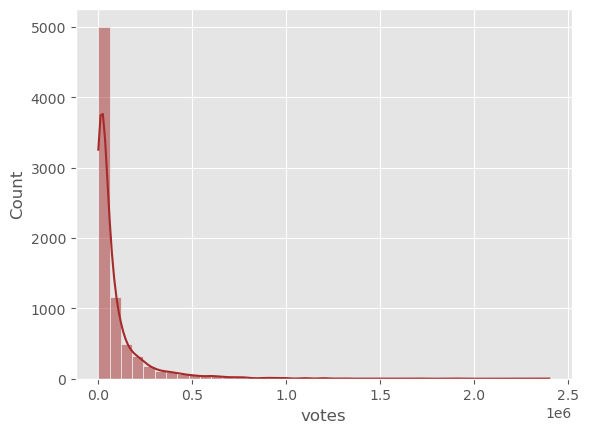

In [21]:
# Visualize the distribution within 'votes'

sns.histplot(x='votes', data=df, bins=40, kde=True, color='brown')

<AxesSubplot:xlabel='runtime', ylabel='Count'>

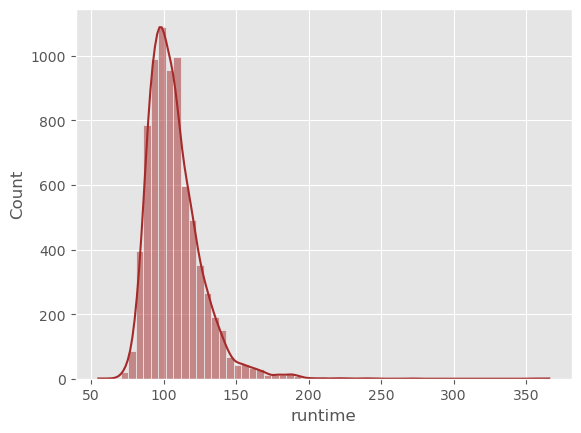

In [65]:
# Let's look at the 'runtime' distribution

sns.histplot(x='runtime', data=df, bins=60, kde=True, color='brown')

In [66]:
# Let's look at the average gross figure

df['gross'].mean()

77654695.45670106

In [23]:
# View highest gross figure

df['gross'].max()

2847246203.0

In [24]:
# Let's look at the details of the highest grossing movie

df[df['gross'] == df['gross'].max()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009-12-18,United States


In [67]:
# View the details of the lowest grossing movie

df[df['gross'] == df['gross'].min()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_country
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000.0,309.0,Daybreak,85.0,1997-10-01,Brazil


In [68]:
# Let's see the average budget figure

df['budget'].mean()

33907232.17407412

In [26]:
# View highest budget figure

df['budget'].max()

356000000.0

In [27]:
# Let's view the details of the movie with the highest budget

df[df['budget'] == df['budget'].max()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_country
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019-04-26,United States


In [28]:
# View details of the movie with the lowest budget

df[df['budget'] == df['budget'].min()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_country
471,A Polish Vampire in Burbank,Not Rated,Comedy,1983,"October 31, 1983 (United States)",5.0,275.0,Mark Pirro,Mark Pirro,Mark Pirro,United States,3000.0,2.148441e+07,Pirromount Pictures,80.0,1983-10-31,United States


In [29]:
# Let's view the details of the movie with the highest score

df[df['score'] == df['score'].max()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_country
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291.0,Castle Rock Entertainment,142.0,1994-10-14,United States


In [63]:
# View details of the movie with the lowest score

df[df['score'] == df['score'].min()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,released_country
4594,Superbabies: Baby Geniuses 2,PG,Comedy,2004,"August 27, 2004 (United States)",1.9,30000.0,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000.0,9448644.0,ApolloMedia Distribution,88.0,2004-08-27,United States
5306,Disaster Movie,PG-13,Comedy,2008,"August 29, 2008 (United States)",1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,34816824.0,Lionsgate,87.0,2008-08-29,United States
5354,The Hottie & the Nottie,PG-13,Comedy,2008,"February 21, 2008 (Russia)",1.9,36000.0,Tom Putnam,Heidi Ferrer,Paris Hilton,United States,43527500.0,1596232.0,Purple Pictures,91.0,2008-02-21,Russia


In [64]:
# Average movie score

df['score'].mean()

6.390410958904098

In [70]:
# Number of movies made between year 2000 and 2020 with an average score or higher

df[(df['year'] >= 2000) & (df['score'] >= 6.39)]['year'].count()

2343

In [71]:
# Number of movies made between 1980 and 1999 with an average score or higher

df[(df['year'] <= 1999) & (df['score'] >= 6.39)]['year'].count()

1872

In [34]:
# The average score of movies made between year 2000 and 2020

df[df['year'] >= 2000]['score'].mean()

6.463396579596689

In [38]:
# The average score of movies made between 1980 and 1999

df[df['year'] <= 1999]['score'].mean()

6.309772165797424

In [78]:
# How many stars have only appeared in a single movie 

sum(df['star'].value_counts() == 1)

1771

In [82]:
# Get the index with the highest number of votes

df['votes'].argmax()

2443

In [83]:
# Get the index with the lowest number of votes

df['votes'].argmin()

7667

In [72]:
# Number of movies where 'country' is different from 'released country'

df[df['country'] != df['released_country']]['name'].count()

2094

In [103]:
# 10 most common movie release countries

df['released_country'].value_counts().head(10)

United States     6737
United Kingdom     197
France             148
Australia           48
Germany             46
Japan               44
Canada              32
India               31
Spain               31
South Korea         30
Name: released_country, dtype: int64

In [104]:
# Number of unique ratings

df['rating'].nunique()

12

In [73]:
# 10 most common companies

df['company'].value_counts().head(10)

Universal Pictures           394
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: company, dtype: int64

In [75]:
# 5 most common stars

df['star'].value_counts().head(5)

Nicolas Cage         44
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
Name: star, dtype: int64

In [77]:
# Number of times stars have featured in movies with above average score

df[df['score'] > 6.39]['star'].value_counts()

Denzel Washington    33
Tom Hanks            28
Johnny Depp          26
Tom Cruise           25
Robert De Niro       24
                     ..
Colin Friels          1
Björk                 1
Emilio Echevarría     1
Dominique Michel      1
Christina Roz         1
Name: star, Length: 1823, dtype: int64

In [60]:
# Unique movies release countries

df['released_country'].unique()

array(['United States', 'Australia', 'Japan', 'Ireland', 'Argentina',
       'Soviet Union', 'United Kingdom', 'Sweden', 'France', 'Canada',
       'Brazil', 'South Korea', 'West Germany', 'Italy', 'Denmark',
       'Netherlands', 'Uruguay', 'Hong Kong', 'Taiwan', 'Yugoslavia',
       'Spain', 'Finland', 'South Africa', 'Philippines', 'Portugal',
       'Mexico', 'Germany', 'New Zealand', 'Iran', 'Greece', 'Singapore',
       'Poland', 'India', 'Federal Republic of Yugoslavia', 'Iceland',
       'Belgium', 'Israel', 'Hungary', 'China', 'Russia', 'Norway',
       'Austria', 'Thailand', 'Puerto Rico', 'Turkey', 'Romania',
       'Czech Republic', 'Latvia', 'Indonesia', 'Bahrain', 'Kazakhstan',
       'Malaysia', 'Croatia', 'Bulgaria', 'Lebanon',
       'United Arab Emirates', 'Ukraine', 'Bahamas', 'Kuwait', 'Vietnam',
       'Cameroon'], dtype=object)